In [66]:
from os import listdir
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
genuine_image_filenames = listdir("trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine")
forged_image_filenames = listdir("trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries")

genuine_image_paths = "trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Genuine"
forged_image_paths = "trainingSet/OfflineSignatures/Chinese/TrainingSet/Offline Forgeries"

'''genuine_image_features = [[] for x in range(2)]
forged_image_features = [[] for x in range(2)]

for name in genuine_image_filenames:
    signature_id = int(name.split('_')[0][-3:])
    genuine_image_features[signature_id - 1].append({"name": name})

for name in forged_image_filenames:
    signature_id = int(name.split('_')[0][-3:])
    forged_image_features[signature_id - 1].append({"name": name})'''
    
    
    

'genuine_image_features = [[] for x in range(2)]\nforged_image_features = [[] for x in range(2)]\n\nfor name in genuine_image_filenames:\n    signature_id = int(name.split(\'_\')[0][-3:])\n    genuine_image_features[signature_id - 1].append({"name": name})\n\nfor name in forged_image_filenames:\n    signature_id = int(name.split(\'_\')[0][-3:])\n    forged_image_features[signature_id - 1].append({"name": name})'

In [67]:
len(genuine_image_filenames)

235

In [68]:
len(forged_image_filenames)

340

In [69]:
train_Xr=[]
train_Y=[]
for im in genuine_image_filenames:
    image_path=genuine_image_paths+"/"+im
    img=cv2.imread(image_path)
    train_Xr.append(img)
    train_Y.append(1)

  
        

for im in forged_image_filenames:
    image_path=forged_image_paths+"/"+im
    img=cv2.imread(image_path)
    train_Xr.append(img)
    train_Y.append(0)   


(366, 889)


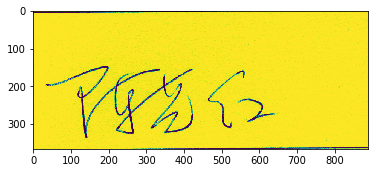

In [70]:
%matplotlib inline
train_X_br=[]
for i in train_Xr:
    train_X_br.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
print(np.shape(train_X_br[0])) 
plt.imshow(train_X_br[0])

In [71]:

dim=(120,120)
train_X=[]
for i in train_X_br:
     train_X.append(cv2.resize(i, dim, interpolation = cv2.INTER_AREA))
#plt.imshow(train_X[0])
#plt.imshow(train_X_br[0])


In [72]:
train_X=np.array(train_X)
train_X = train_X.reshape(-1, 120,120, 1)
#test_X = test_X.reshape(-1, 120,120, 1)
print(np.shape(train_X[0]))
train_X = train_X.astype('float32')
#test_X = test_X.astype('float32')
train_X = train_X / 255
#test_X = test_X / 255

(120, 120, 1)


In [73]:
train_Y_one_hot = to_categorical(train_Y)
#test_Y_one_hot = to_categorical(test_Y)
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [74]:
batch_size = 115
epochs = 30
num_classes = 2

In [75]:
signature_model = Sequential()
signature_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(120,120,1),padding='same'))
signature_model.add(LeakyReLU(alpha=0.01))
signature_model.add(MaxPooling2D((2, 2),padding='same'))
signature_model.add(Dropout(0.25))
signature_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
signature_model.add(LeakyReLU(alpha=0.01))
signature_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
signature_model.add(Dropout(0.25))

signature_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
signature_model.add(LeakyReLU(alpha=0.01))                  
signature_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
signature_model.add(Dropout(0.4))
signature_model.add(Flatten())
signature_model.add(Dense(128, activation='linear'))
signature_model.add(LeakyReLU(alpha=0.01))   
signature_model.add(Dropout(0.3))
signature_model.add(Dense(num_classes, activation='softmax'))

In [1]:
signature_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
signature_model.summary()

NameError: name 'signature_model' is not defined

In [77]:
signature_train = signature_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))



Train on 460 samples, validate on 115 samples
Epoch 1/30
460/460 [==============================] - 39s 86ms/step - loss: 4.9596 - acc: 0.5717 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 2/30
460/460 [==============================] - 37s 81ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 3/30
460/460 [==============================] - 39s 84ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 4/30
460/460 [==============================] - 37s 80ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 5/30
460/460 [==============================] - 38s 82ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 6/30
460/460 [==============================] - 36s 78ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 7/30
460/460 [==============================] - 37s 80ms/step - loss: 6.4122 - acc: 0.6022 - val_loss: 7.2882 - val_acc: 0.5478
Epoch 8/30
460/4